# Import thư viện


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from matplotlib import ticker
import warnings

warnings.filterwarnings("ignore")


# Phân tích dữ liệu của khách sạn `Resort Hotel`


## Đọc dữ liệu


In [2]:
df = pd.read_csv("../Data/Created Data/hotel_bookings_added_revenue_resort.csv")
df


,arrival_date,reservation_status_date,hotel,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,...,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,continent,revenue
0,2015-07-01,2015-07-01,Resort Hotel,BB,PRT,Direct,Direct,C,C,No Deposit,...,0,0,0,3,0,0.00,0,0,Europe,0.00
1,2015-07-01,2015-07-01,Resort Hotel,BB,PRT,Direct,Direct,C,C,No Deposit,...,0,0,0,4,0,0.00,0,0,Europe,0.00
2,2015-07-01,2015-07-02,Resort Hotel,BB,GBR,Direct,Direct,A,C,No Deposit,...,0,0,0,0,0,75.00,0,0,Europe,75.00
3,2015-07-01,2015-07-02,Resort Hotel,BB,GBR,Corporate,Corporate,A,A,No Deposit,...,0,0,0,0,0,75.00,0,0,Europe,75.00
4,2015-07-01,2015-07-03,Resort Hotel,BB,GBR,Online TA,TA/TO,A,A,No Deposit,...,0,0,0,0,0,98.00,0,1,Europe,196.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33950,2017-08-31,2017-09-10,Resort Hotel,BB,GBR,Offline TA/TO,TA/TO,A,A,No Deposit,...,0,0,0,1,0,89.75,0,0,Europe,897.50
33951,2017-08-30,2017-09-10,Resort Hotel,BB,IRL,Direct,Direct,E,E,No Deposit,...,0,0,0,0,0,202.27,0,1,Europe,2224.97
33952,2017-08-29,2017-09-12,Resort Hotel,BB,IRL,Direct,Direct,E,E,No Deposit,...,0,0,0,0,0,153.57,0,3,Europe,2149.98
33953,2017-08-31,2017-09-14,Resort Hotel,HB,GBR,Offline TA/TO,TA/TO,D,D,No Deposit,...,0,0,0,0,0,112.80,0,1,Europe,1579.20


## Chuyển 2 cột date thành kiểu datetime trước rồi tiếp tục làm việc


In [3]:
def change_df(df):
    format_year = "%Y-%m-%d"

    df["arrival_date"] = pd.to_datetime(df["arrival_date"], format=format_year)
    df["reservation_status_date"] = pd.to_datetime(
        df["reservation_status_date"], format=format_year
    )


change_df(df)


## I) TỔNG QUAN VỀ TÌNH HÌNH ĐẶT PHÒNG KHÁCH SẠN LOẠI "CITY"


### 1. Tỷ lệ đặt phòng chia theo khách nội địa và quốc tế


In [4]:
hotel_data = df[df["country"] != "undefined"]
city_hotel_data = hotel_data

internal_customers = city_hotel_data[city_hotel_data["country"] == "PRT"]
foreign_customers = city_hotel_data[city_hotel_data["country"] != "PRT"]

total_customers = len(city_hotel_data)
internal_percentage = len(internal_customers) / total_customers * 100
foreign_percentage = len(foreign_customers) / total_customers * 100

internal_percentage, foreign_percentage


(42.46023456384852, 57.53976543615148)

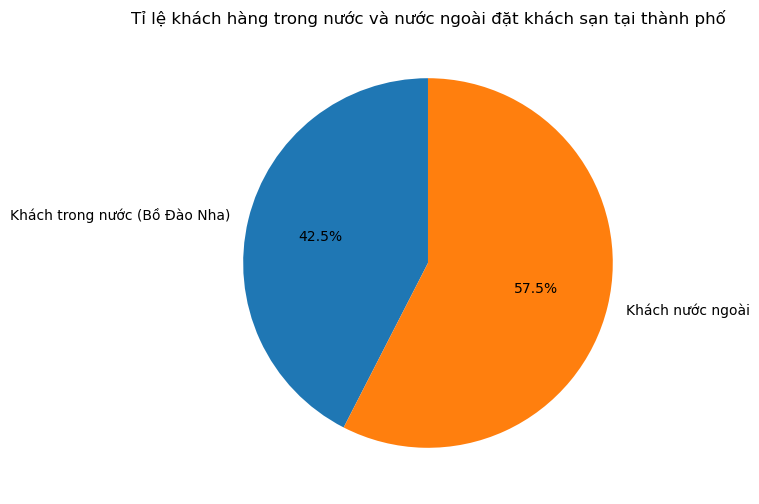

In [5]:
plt.figure(figsize=(10, 6))
plt.pie(
    [internal_percentage, foreign_percentage],
    labels=["Khách trong nước (Bồ Đào Nha)", "Khách nước ngoài"],
    autopct="%1.1f%%",
    startangle=90,
)
plt.title("Tỉ lệ khách hàng trong nước và nước ngoài đặt khách sạn tại thành phố")
plt.show()


**Nhận xét**:
Cân bằng giữa hai loại khách => xu hướng cả 2 loại khách đều thích Resort....
-:
...


### 2. Tỷ lệ khách quốc tế đặt phòng


In [6]:
foreign_nationalities = foreign_customers["country"].value_counts()

foreign_nationalities_percentage = (
    foreign_nationalities / len(foreign_customers)
) * 100

# top 10 highest countries
top_countries = foreign_nationalities_percentage.head(10)

top_countries


GBR    30.615632
ESP    17.981432
IRL    10.103210
FRA     7.390696
DEU     4.771537
CN      3.122245
NLD     2.489497
USA     2.375395
ITA     2.173124
CHE     2.152378
Name: country, dtype: float64

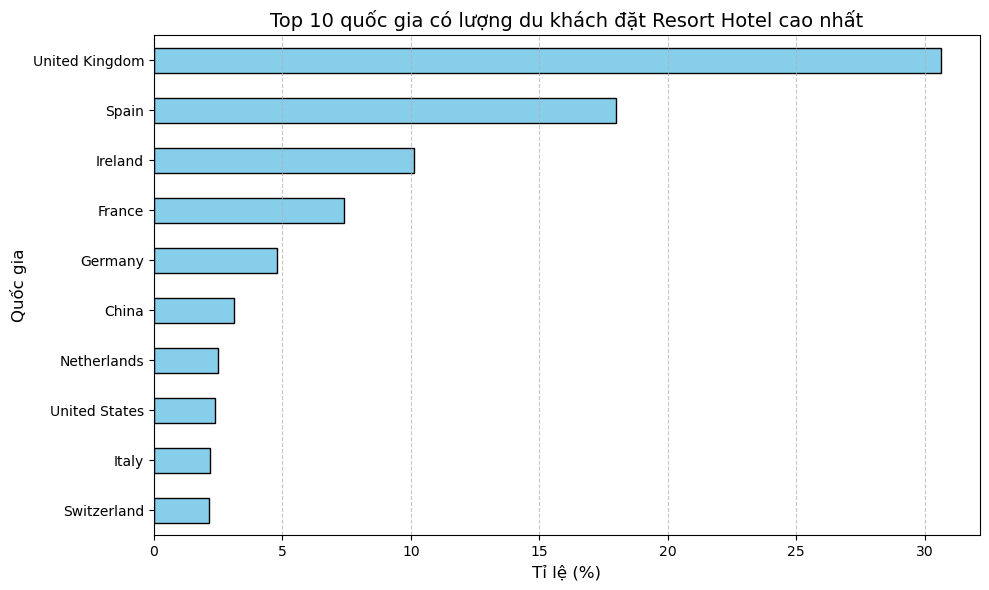

In [7]:
# top 10 countries with highest percentage of foreign customers
plt.figure(figsize=(10, 6))
top_10_countries = top_countries.sort_values(ascending=True).tail(10)
top_10_countries.sort_values().plot(kind="barh", color="skyblue", edgecolor="black")

mapping = {
    "GBR": "United Kingdom",
    "FRA": "France",
    "DEU": "Germany",
    "ESP": "Spain",
    "ITA": "Italy",
    "IRL": "Ireland",
    "BEL": "Belgium",
    "BRA": "Brazil",
    "NLD": "Netherlands",
    "USA": "United States",
    "CHE": "Switzerland",
    "CN": "China",
}
plt.yticks(
    ticks=range(10),
    labels=[mapping.get(country, country) for country in top_10_countries.index],
)

plt.title("Top 10 quốc gia có lượng du khách đặt Resort Hotel cao nhất", fontsize=14)
plt.xlabel("Tỉ lệ (%)", fontsize=12)
plt.ylabel("Quốc gia", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()

plt.show()


**Nhận xét**:
Trong top 10 quốc gia đặt phòng thì có CN (quốc gia châu Á), thể hiện loại hình khách sạn Resort được nhiều du khách từ đa dạng châu lục hơn so với City, vì..., đề xuất,...


### 3. Doanh thu phân theo loại khách đặt phòng


In [8]:
# raw number of bookings and percentages
total_bookings = city_hotel_data["customer_type"].value_counts()
percentage_bookings = (total_bookings / total_bookings.sum()) * 100

# total revenue (raw amount) and percentages
total_revenue = city_hotel_data.groupby("customer_type")["revenue"].sum()
percentage_revenue = (total_revenue / total_revenue.sum()) * 100

# all insights into a DataFrame for comparison
detailed_customer_analysis = pd.DataFrame(
    {
        "total_bookings": total_bookings,
        "percentage_bookings": percentage_bookings,
        "total_revenue": total_revenue,
        "percentage_revenue": percentage_revenue,
    }
).sort_values(by="total_revenue", ascending=False)

detailed_customer_analysis


,total_bookings,percentage_bookings,total_revenue,percentage_revenue
Transient,26926,80.354532,12811549.68,82.173843
Transient-Party,4648,13.870900,1560914.42,10.011774
Contract,1668,4.977767,1143182.16,7.332421
Group,267,0.796801,75141.76,0.481963


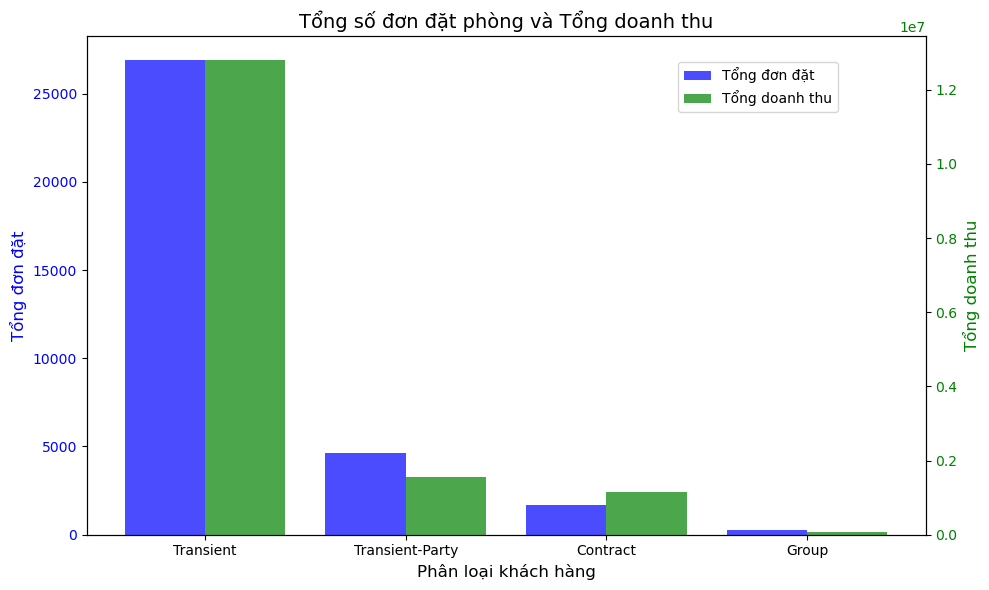

In [9]:
fig, ax1 = plt.subplots(figsize=(10, 6))

x = range(len(detailed_customer_analysis))
bar_width = 0.4
ax1.bar(
    x,
    detailed_customer_analysis["total_bookings"],
    bar_width,
    color="blue",
    alpha=0.7,
    label="Tổng đơn đặt",
)
ax1.set_ylabel("Tổng đơn đặt", color="blue", fontsize=12)
ax1.tick_params(axis="y", labelcolor="blue")

ax2 = ax1.twinx()
ax2.bar(
    [p + bar_width for p in x],
    detailed_customer_analysis["total_revenue"],
    bar_width,
    color="green",
    alpha=0.7,
    label="Tổng doanh thu",
)
ax2.set_ylabel("Tổng doanh thu", color="green", fontsize=12)
ax2.tick_params(axis="y", labelcolor="green")

# Labels, title, and legend
ax1.set_xlabel("Phân loại khách hàng", fontsize=12)
ax1.set_xticks([p + bar_width / 2 for p in x])
ax1.set_xticklabels(detailed_customer_analysis.index)
fig.legend(loc="upper right", bbox_to_anchor=(0.85, 0.9), fontsize=10)
plt.title("Tổng số đơn đặt phòng và Tổng doanh thu", fontsize=14)
plt.tight_layout()
plt.show()


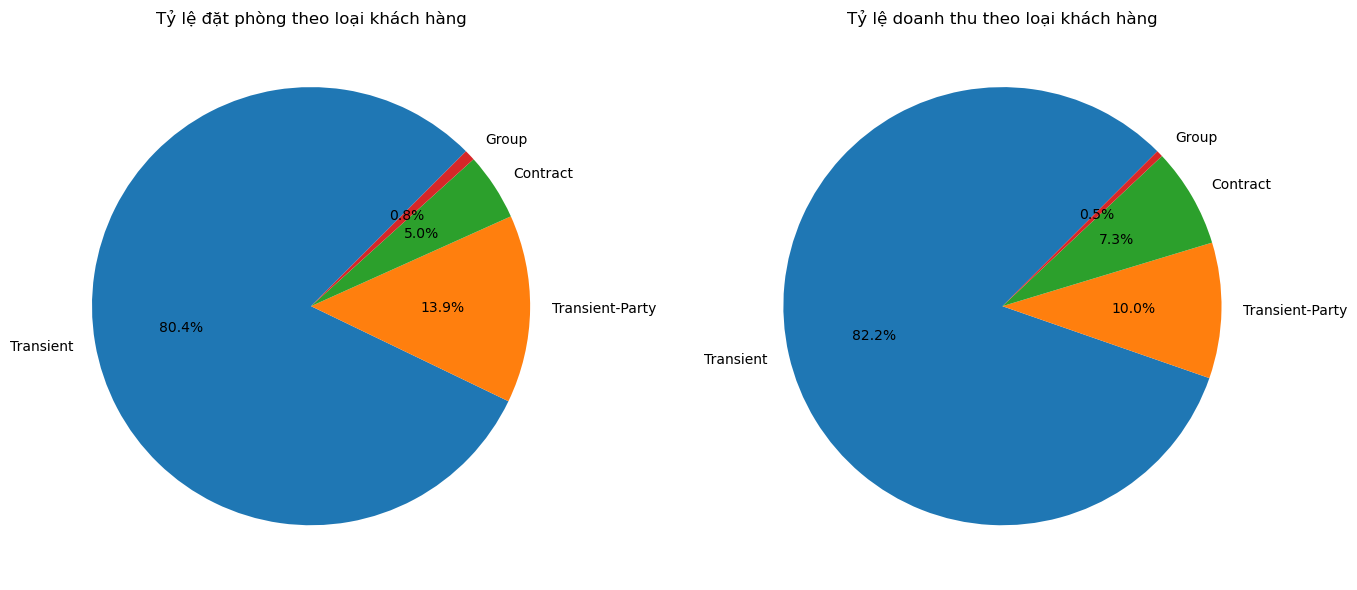

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].pie(
    detailed_customer_analysis["percentage_bookings"],
    labels=detailed_customer_analysis.index,
    autopct="%1.1f%%",
    startangle=45,
)
ax[0].set_title("Tỷ lệ đặt phòng theo loại khách hàng")


ax[1].pie(
    detailed_customer_analysis["percentage_revenue"],
    labels=detailed_customer_analysis.index,
    autopct="%1.1f%%",
    startangle=45,
)
ax[1].set_title("Tỷ lệ doanh thu theo loại khách hàng")

plt.tight_layout()
plt.show()


**Nhận xét**: Khách vãng lai (Transient) tuy chỉ ở thời gian ngắn nhung chiếm số đơn lớn nhất (80.4%), đồng thời đa số doanh thu cũng đến từ nguồn khách này


## II) KHÁCH NỘI ĐỊA HAY QUỐC TẾ CÓ TỈ LỆ HỦY ĐƠN CAO HƠN ?


### Vẽ biểu đồ thể hiện tỉ lệ hủy đơn qua các quý của khách nội địa và khách quốc tế


#### Tính số đơn hủy qua các quý của khách nội địa và khách quốc tế


In [11]:
df["quarter_year"] = df["arrival_date"].dt.to_period("Q")
df["is_domestic"] = df["country"] == "PRT"


df_canceled = df[df["is_canceled"] == 1]

num_canceled_order = (
    df_canceled.groupby(["is_domestic", "quarter_year"]).size().unstack()
)

num_canceled_order


quarter_year,2015Q3,2015Q4,2016Q1,2016Q2,2016Q3,2016Q4,2017Q1,2017Q2,2017Q3
is_domestic,,,,,,,,,
False,20,18,18,167,513,456,377,796,705
True,853,390,460,695,754,356,324,530,542


#### Tính số đơn đã đặt qua các qúy của khách nội địa và khách quốc tế


In [12]:
num_order = df.groupby(["is_domestic", "quarter_year"]).size().unstack()

num_order


quarter_year,2015Q3,2015Q4,2016Q1,2016Q2,2016Q3,2016Q4,2017Q1,2017Q2,2017Q3
is_domestic,,,,,,,,,
False,1797,1488,1521,2411,2566,2519,2118,3178,2129
True,1993,1479,1905,1615,1687,1405,1564,1326,1254


#### Tỉ lệ hủy đơn qua các quý của khách nội địa và khách quốc tế


In [13]:
cancel_ratio = num_canceled_order / num_order * 100

cancel_ratio = cancel_ratio.round(2)

cancel_ratio


quarter_year,2015Q3,2015Q4,2016Q1,2016Q2,2016Q3,2016Q4,2017Q1,2017Q2,2017Q3
is_domestic,,,,,,,,,
False,1.11,1.21,1.18,6.93,19.99,18.10,17.80,25.05,33.11
True,42.80,26.37,24.15,43.03,44.69,25.34,20.72,39.97,43.22


#### Chuyển vị lại bảng


In [14]:
cancel_ratio = cancel_ratio.T

cancel_ratio


is_domestic,False,True
quarter_year,,
2015Q3,1.11,42.80
2015Q4,1.21,26.37
2016Q1,1.18,24.15
2016Q2,6.93,43.03
2016Q3,19.99,44.69
2016Q4,18.10,25.34
2017Q1,17.80,20.72
2017Q2,25.05,39.97
2017Q3,33.11,43.22


#### Đổi tên cột và reset index


In [15]:
cancel_ratio = cancel_ratio.rename(columns={False: "international", True: "domestic"})

cancel_ratio = cancel_ratio.reset_index(names="quarter_year")

cancel_ratio.columns


Index(['quarter_year', 'international', 'domestic'], dtype='object', name='is_domestic')

#### Vẽ biểu đồ


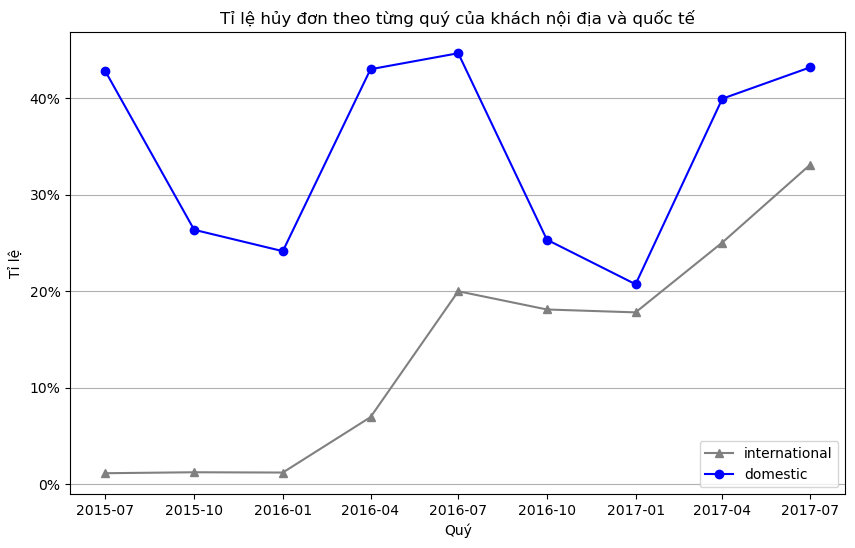

In [16]:
def percent(x, pos):
    return f"{x:.0f}%"


cancel_ratio["quarter_year_tst"] = cancel_ratio["quarter_year"].dt.to_timestamp()


plt.figure(figsize=(10, 6))
plt.plot(
    cancel_ratio["quarter_year_tst"],
    cancel_ratio["international"],
    label="international",
    marker="^",
    color="gray",
)
plt.plot(
    cancel_ratio["quarter_year_tst"],
    cancel_ratio["domestic"],
    label="domestic",
    marker="o",
    color="blue",
)


plt.title("Tỉ lệ hủy đơn theo từng quý của khách nội địa và quốc tế")
plt.grid(axis="y")
plt.ylabel("Tỉ lệ")
plt.xlabel("Quý")
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(percent))
plt.legend()
plt.show()


- Từ biểu đồ nhận thấy tỉ lệ hủy đơn qua các quý của khách nội địa cao hơn nhiều so với khách quốc tế


### Thực hiện kiểm định như sau:

- H0: Trung bình tỉ lệ hủy đơn trong 1 tuần của khách nội địa và quốc tế là như nhau
- H1: Trung bình tỉ lệ hủy đơn trong 1 tuần của khách nội địa lớn hơn khách quốc tế
- alpha = 0.05

- Lí do chọn 1 tuần mà không phải 1 tháng hay quý: để khảo sát ở khoảng thời gian hẹp hơn khi đó có nhiều mẫu để thực hiện kiểm định


#### Tính số đơn hủy qua các tuần của khách nội địa và khách quốc tế


In [17]:
df["week_year"] = df["arrival_date"].dt.to_period("W")

df_canceled = df[df["is_canceled"] == 1]

num_canceled_order = df_canceled.groupby(["is_domestic", "week_year"]).size().unstack()

num_canceled_order = num_canceled_order.fillna(0)

num_canceled_order


week_year,2015-06-29/2015-07-05,2015-07-06/2015-07-12,2015-07-13/2015-07-19,2015-07-20/2015-07-26,2015-07-27/2015-08-02,2015-08-03/2015-08-09,2015-08-10/2015-08-16,2015-08-17/2015-08-23,2015-08-24/2015-08-30,2015-08-31/2015-09-06,...,2017-06-26/2017-07-02,2017-07-03/2017-07-09,2017-07-10/2017-07-16,2017-07-17/2017-07-23,2017-07-24/2017-07-30,2017-07-31/2017-08-06,2017-08-07/2017-08-13,2017-08-14/2017-08-20,2017-08-21/2017-08-27,2017-08-28/2017-09-03
is_domestic,,,,,,,,,,,,,,,,,,,,,
False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,...,74.0,63.0,72.0,69.0,91.0,97.0,72.0,92.0,73.0,45.0
True,48.0,47.0,65.0,67.0,88.0,70.0,93.0,60.0,76.0,72.0,...,66.0,49.0,62.0,64.0,52.0,77.0,52.0,77.0,57.0,26.0


#### Tính số đơn qua các tuần của khách nội địa và khách quốc tế


In [18]:
num_order = df.groupby(["is_domestic", "week_year"]).size().unstack()

num_order = num_order.fillna(0)

num_order


week_year,2015-06-29/2015-07-05,2015-07-06/2015-07-12,2015-07-13/2015-07-19,2015-07-20/2015-07-26,2015-07-27/2015-08-02,2015-08-03/2015-08-09,2015-08-10/2015-08-16,2015-08-17/2015-08-23,2015-08-24/2015-08-30,2015-08-31/2015-09-06,...,2017-06-26/2017-07-02,2017-07-03/2017-07-09,2017-07-10/2017-07-16,2017-07-17/2017-07-23,2017-07-24/2017-07-30,2017-07-31/2017-08-06,2017-08-07/2017-08-13,2017-08-14/2017-08-20,2017-08-21/2017-08-27,2017-08-28/2017-09-03
is_domestic,,,,,,,,,,,,,,,,,,,,,
False,104,121,119,123,135,103,118,104,121,161,...,218,236,256,229,252,252,231,238,222,135
True,114,142,174,164,197,185,215,171,178,152,...,149,102,150,122,120,170,128,187,148,64


#### Tỉ lệ hủy đơn qua các tuần của khách nội địa và khách quốc tế


In [19]:
cancel_ratio = num_canceled_order / num_order * 100

cancel_ratio = cancel_ratio.round(2)

cancel_ratio


week_year,2015-06-29/2015-07-05,2015-07-06/2015-07-12,2015-07-13/2015-07-19,2015-07-20/2015-07-26,2015-07-27/2015-08-02,2015-08-03/2015-08-09,2015-08-10/2015-08-16,2015-08-17/2015-08-23,2015-08-24/2015-08-30,2015-08-31/2015-09-06,...,2017-06-26/2017-07-02,2017-07-03/2017-07-09,2017-07-10/2017-07-16,2017-07-17/2017-07-23,2017-07-24/2017-07-30,2017-07-31/2017-08-06,2017-08-07/2017-08-13,2017-08-14/2017-08-20,2017-08-21/2017-08-27,2017-08-28/2017-09-03
is_domestic,,,,,,,,,,,,,,,,,,,,,
False,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,4.97,...,33.94,26.69,28.12,30.13,36.11,38.49,31.17,38.66,32.88,33.33
True,42.11,33.1,37.36,40.85,44.67,37.84,43.26,35.09,42.7,47.37,...,44.30,48.04,41.33,52.46,43.33,45.29,40.62,41.18,38.51,40.62


#### chuyển vị lại bảng và đặt tên lại các cột


In [20]:
cancel_ratio = cancel_ratio.T

new_columns = {False: "international", True: "domestic"}

cancel_ratio = cancel_ratio.rename(columns=new_columns)

cancel_ratio


is_domestic,international,domestic
week_year,,
2015-06-29/2015-07-05,0.00,42.11
2015-07-06/2015-07-12,0.00,33.10
2015-07-13/2015-07-19,0.00,37.36
2015-07-20/2015-07-26,0.00,40.85
2015-07-27/2015-08-02,0.00,44.67
...,...,...
2017-07-31/2017-08-06,38.49,45.29
2017-08-07/2017-08-13,31.17,40.62
2017-08-14/2017-08-20,38.66,41.18


#### Tính trung bình tỉ lệ hủy đơn trong 1 tuần của khách nội địa và khách quốc tế


In [21]:
mean_by_origin = cancel_ratio.mean()
mean_by_origin


is_domestic
international    12.945439
domestic         34.517807
dtype: float64

#### Tạo hàm tính thống kê kiểm định


In [22]:
def get_statistic(sample_a, sample_b):
    return np.mean(sample_a) - np.mean(sample_b)


#### Thực hiện kiểm định bằng permutation test


In [23]:
p_value = stats.permutation_test(
    (cancel_ratio["domestic"], cancel_ratio["international"]),
    statistic=get_statistic,
    n_resamples=1000000,
    alternative="greater",
).pvalue

p_value


9.99999000001e-07

- Giá trị p_value < 0.05 nên có cơ sở khẳng định trung bình tỉ lệ hủy đơn trong 1 tuần của khách nội địa lớn hơn khách quốc tế

- Từ biểu đồ tỉ lệ hủy đơn theo quý và kết quả kiểm định như trên, có thể khẳng định rằng khách nội địa có xu hướng hủy đơn nhiều hơn so với khách quốc tế

- Ý nghĩa: Việc khách nội địa có xu hướng hủy đơn nhiều hơn chứng tỏ dịch vụ của khách sạn vẫn chưa thực sự tốt, chính vì vậy, khách sạn cần cải thiện chất lượng dịch vụ để đáp ứng với yêu cầu của khách nội địa tốt hơn, vì thị trường nội địa đóng vai trò quan trọng trong sự phát triển của khách sạn.


## III) THỜI ĐIỂM NÀO KHÁCH HÀNG CÓ KHẢ NĂNG ĐẶT PHÒNG NHƯ Ý NHIỀU NHẤT (ƯỚC LƯỢNG THÁNG ĐỘ TIN CẬY 95%)


### Tính số đơn như ý theo từng tháng


In [24]:
df["month"] = df["arrival_date"].dt.month

df_assign_like_order = df[df["assigned_room_type"] == df["reserved_room_type"]]

num_order_assign_like_order_by_month = (
    df_assign_like_order["month"].value_counts().sort_index()
)

num_order_assign_like_order_by_month


1     1191
2     1731
3     1968
4     2260
5     2372
6     2416
7     3824
8     4197
9     1983
10    2078
11    1405
12    1518
Name: month, dtype: int64

### Tính số đơn theo từng tháng


In [25]:
num_order_by_month = df["month"].value_counts().sort_index()

num_order_by_month


1     1961
2     2491
3     2656
4     2828
5     2942
6     2760
7     4312
8     4664
9     2450
10    2726
11    2050
12    2115
Name: month, dtype: int64

### Tỉ lệ phần trăm đơn đặt được như ý theo từng tháng


In [26]:
percent_num_order_assign_like_order_by_month = (
    num_order_assign_like_order_by_month / num_order_by_month * 100
)
percent_num_order_assign_like_order_by_month = (
    percent_num_order_assign_like_order_by_month.round(2)
)


percent_num_order_assign_like_order_by_month


1     60.73
2     69.49
3     74.10
4     79.92
5     80.63
6     87.54
7     88.68
8     89.99
9     80.94
10    76.23
11    68.54
12    71.77
Name: month, dtype: float64

### Gộp lại thành bảng


In [27]:
num_order_assign_like_order_by_month = num_order_assign_like_order_by_month.to_frame(
    name="num_order_assign_like_order"
)
num_order_by_month = num_order_by_month.to_frame(name="num_order")
percent_num_order_assign_like_order_by_month = (
    percent_num_order_assign_like_order_by_month.to_frame(name="percent")
)

table = pd.concat(
    [
        num_order_assign_like_order_by_month,
        num_order_by_month,
        percent_num_order_assign_like_order_by_month,
    ],
    axis=1,
)

table


,num_order_assign_like_order,num_order,percent
1,1191,1961,60.73
2,1731,2491,69.49
3,1968,2656,74.10
4,2260,2828,79.92
5,2372,2942,80.63
6,2416,2760,87.54
7,3824,4312,88.68
8,4197,4664,89.99
9,1983,2450,80.94
10,2078,2726,76.23


### Tìm khoảng tin cậy cho tỉ lệ đơn như ý theo từng tháng


#### Tìm số đơn đặt không như ý theo từng tháng


In [28]:
table["num_order_assign_not_like_order"] = (
    table["num_order"] - table["num_order_assign_like_order"]
)


#### Tạo danh sách gồm 2 số 1 và 0, 1: như ý và 0: không như ý


In [29]:
# 1: đơn được như ý và 0: là không như ý
list_1_by_month = table["num_order_assign_like_order"].apply(lambda x: [1] * x)
list_0_by_month = table["num_order_assign_not_like_order"].apply(lambda x: [0] * x)

list_1_and_0_by_month = list_1_by_month + list_0_by_month

list_1_and_0_by_month


1     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
2     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
3     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
4     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
5     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
6     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
7     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
8     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
9     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
10    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
11    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
12    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
dtype: object

#### Thực hiện ước lượng khoảng tin cậy cho tỉ lệ đặt đơn như ý trong từng tháng


In [ ]:
def get_ci_for_ratio(sample):
    res = stats.bootstrap(
        (sample,), np.mean, confidence_level=0.95, n_resamples=100000
    ).confidence_interval

    res = [round(item * 100, 2) for item in res]

    return res


ci_for_ratio_by_month = list_1_and_0_by_month.apply(lambda x: get_ci_for_ratio(x))

ci_for_ratio_by_month


#### Tổng hợp vào trong bảng


In [ ]:
table["lower_ratio_bound"] = ci_for_ratio_by_month.apply(lambda x: x[0])
table["upper_ratio_bound"] = ci_for_ratio_by_month.apply(lambda x: x[1])

table


### Vẽ biểu đồ minh họa cho khoảng tin cậy 95% tỉ lệ đặt đơn như ý theo từng tháng và biểu đồ số đơn đặt theo từng tháng


In [ ]:
def percent(x, pos):
    return f"{x:.0f}%"


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Vẽ biểu đồ khoảng tin cậy cho tỉ lệ
ax = axes[0]
ax.plot(
    table.index, table["lower_ratio_bound"], marker="^", label="lower 95%", color="grey"
)
ax.plot(
    table.index, table["upper_ratio_bound"], marker="o", label="upper 95%", color="cyan"
)


ax.set_xticks(table.index)
ax.set_xlabel("Tháng")
ax.set_ylabel("Tỉ lệ")
ax.set_title("Khoảng tin cậy 95% cho tỉ lệ đặt được phòng như ý")
ax.legend()
ax.grid(axis="y")

ax.yaxis.set_major_formatter(ticker.FuncFormatter(percent))

# Vẽ biểu đồ số đơn đặt theo từng tháng
ax = axes[1]
ax.plot(table.index, table["num_order"], marker="o", color="blue")

ax.set_xticks(table.index)
ax.set_xlabel("Tháng")
ax.set_ylabel("Đơn")
ax.set_title("Số đơn đặt theo từng tháng")
ax.grid(axis="y")

plt.show()


- Từ biểu đồ, ta thấy khả năng đặt được phòng như ý từ tháng 5 đến tháng 9 trên 80%, khá cao, còn đối với khoảng thời gian đầu năm và cuối năm khả năng đặt được phòng nhỏ hơn 75%, điều này chứng tỏ với vai trò là khách hàng, nên xem xét việc đặt khách sạn ở khoảng thời gian tháng 5 đến tháng 9 để việc đặt phòng được như ý, qua đó tăng tính trải nghiệm cho chuyến đi

- Với vai trò là khách sạn, cần tìm hiểu nguyên nhân tại sao ở thời điểm đầu năm hay cuối năm, số đơn đặt phòng ít nhưng tỉ lệ đặt phòng như ý là thấp hơn so với khoảng thời gian tháng 7, 8 khi đó số đơn đặt nhiều hơn nhưng tỉ lệ đặt phòng như ý lại cao. Qua đó khách sạn cần cải thiện chất lượng phục vụ khách hàng, tăng tỉ lệ đặt phòng như ý nhằm đảm bảo sự hài lòng của khách hàng ở mức cao nhất


## IV) KHÁCH HÀNG THÍCH ĐẾN VÀO NGÀY TRONG TUẦN HAY CUỐI TUẦN ?


### Tạo cột is_weekend: Ngày đến có phải là vào cuối tuần


In [ ]:
df["week_day"] = df["arrival_date"].dt.weekday

df["is_weekend"] = df["week_day"].isin([5, 6]).astype("int")

df["is_weekend"]


### Tính số đơn đặt theo từng tuần


In [ ]:
df["week_year"] = df["arrival_date"].dt.to_period("W")

num_order_by_week = df["week_year"].value_counts().sort_index()
num_order_by_week


### Chuyển thành bảng


In [ ]:
num_order_by_week = num_order_by_week.to_frame(name="count").reset_index(names="week")

num_order_by_week


### Tính số đơn đặt vào cuối tuần theo từng tuần


In [ ]:
df_weekend = df[df["is_weekend"] == 1]

num_weekend_order_by_week = df_weekend["week_year"].value_counts().sort_index()
num_weekend_order_by_week


### Chuyển thành bảng


In [ ]:
num_weekend_order_by_week = num_weekend_order_by_week.to_frame(
    name="count"
).reset_index(names="week")

num_weekend_order_by_week


### Gộp lại thành 1 bảng


In [ ]:
num_weekend_order_by_week = num_weekend_order_by_week.rename(
    columns={"count": "weekend_count"}
)

table_by_week = pd.merge(
    num_order_by_week, num_weekend_order_by_week, on="week", how="left"
)

table_by_week


### Lấp các giá trị nan trong cột weekend_count bằng 0


In [ ]:
table_by_week["weekend_count"] = table_by_week["weekend_count"].fillna(0)


### Tính cột tỉ lệ phần trăm


In [ ]:
table_by_week["percent"] = table_by_week["weekend_count"] / table_by_week["count"] * 100
table_by_week["percent"] = table_by_week["percent"].round(2)

table_by_week


### Ước lượng khoảng tin cậy cho trung bình tỉ lệ phần trăm đơn được đặt vào cuối tuần trong 1 tuần


In [ ]:
ci = stats.bootstrap(
    (table_by_week["percent"],),
    np.mean,
    confidence_level=0.95,
    n_resamples=1000000,
    method="percentile",
).confidence_interval

ci = [round(item, 2) for item in ci]

ci


- Ý nghĩa: Như vậy khoảng tin cậy cho tỉ lệ phần trăm đơn được đặt vào cuối tuần trong 1 tuần là 28.26% đến 30.59% hoàn toàn nhỏ hơn 50%, từ đó kết luận khách hàng có xu hướng đặt đơn vào ngày trong tuần từ thứ Hai đến thứ Sáu, điều này giúp khách sạn có thể phân bổ nguồn lực hợp lí hơn, tập trung nhiều hơn vào các ngày trong tuần để phục vụ khách hàng tốt hơn, qua đó tăng sự thỏa mãn của khách hàng đối với dịch vụ của khách sạn.


## V) KÊNH PHÂN PHỐI NÀO ĐÓNG GÓP DOANH THU NHIỀU NHẤT (TÍNH THEO TỪNG THÁNG, VẼ BIỂU ĐỒ MIỀN)


### Tính lợi nhuận của từng kênh phân phối theo từng tháng


In [ ]:
df_defined_not_canceled = df[
    (df["distribution_channel"] != "Undefined") & (df["is_canceled"] == 0)
]
df_defined_not_canceled["month"] = df_defined_not_canceled["arrival_date"].dt.month

revenue_by_month = (
    df_defined_not_canceled.groupby(["month", "distribution_channel"])["revenue"]
    .sum()
    .unstack()
)

revenue_by_month = revenue_by_month.fillna(0)

revenue_by_month


### Tính tỉ lệ phần trăm lợi nhuận của từng kênh phân phối theo từng tháng


In [ ]:
revenue_by_month_pct = (
    revenue_by_month.divide(revenue_by_month.sum(axis=1), axis=0) * 100
)
revenue_by_month_pct


### Vẽ biểu đồ


In [ ]:
revenue_by_month_pct.plot(
    kind="area", stacked=True, figsize=(12, 6), colormap="viridis", alpha=0.7
)
plt.title("Tỉ trọng doanh thu của các kênh phân phối qua từng tháng")
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(percent))

plt.show()


- Từ biểu đồ, ta kết luận được kênh phân phối TA/TO đóng góp phần lớn tỉ trọng vào doanh thu của khách sạn, như vậy khách sạn cần tập trung đầu tư vào kênh này để thu hút được nhiều khách hàng hơn


## VI) SO SÁNH TỈ LỆ HỦY ĐƠN GIỮA KHÁCH HÀNG CÓ TIỀN SỬ HỦY ĐƠN VÀ KHÔNG CÓ


### Tạo thống kê cho khách hàng có tiền sử hủy đơn và không có


In [ ]:
df["did_cancel"] = (df["previous_cancellations"] > 0).astype("int")

num_order = df.groupby(["is_canceled", "did_cancel"]).size().unstack()

num_order


### Tính tỉ lệ hủy đơn giữa khách hàng có tiền sử hủy đơn và không có


In [ ]:
num_order_t = num_order.T.copy()

num_order_t["percent"] = num_order_t[1] / (num_order_t[0] + num_order_t[1]) * 100
num_order_t = num_order_t["percent"]
num_order_t


### Thực hiện kiểm định:

- H0: tỉ lệ hủy đơn giữa khách hàng có tiền sử hủy đơn = không có
- H1: tỉ lệ hủy đơn giữa khách hàng có tiền sử hủy đơn > không có


In [ ]:
def get_statistic(x, y):
    return np.mean(x) - np.mean(y)


list_10_did_cancel_in_past = [1] * num_order.loc[1, 1] + [0] * num_order.loc[0, 1]
list_10_not_did_cancel_in_past = [1] * num_order.loc[1, 0] + [0] * num_order.loc[0, 0]

p_value = 0

for i in range(10):
    result = stats.permutation_test(
        (list_10_did_cancel_in_past, list_10_not_did_cancel_in_past),
        statistic=get_statistic,
        n_resamples=10000,
        alternative="greater",
    ).pvalue

    p_value += result

p_value = p_value / 10
p_value


- Ý nghĩa: p_value nhỏ hơn alpha nên có cơ sở khằng định tỉ lệ hủy đơn giữa khách hàng có tiền sử hủy đơn lớn hơn khách hàng không có, như vậy khách sạn cần tập trung cải tiến chất lượng phục vụ của mình, xem xét những điểm yếu cần khắc phục để tránh tình trạng khách hàng có tiền sử hủy đơn trước đây vẫn tiếp tục hủy đơn, gây ảnh hưởng đến danh tiếng và doanh thu của khách sạn.


# Phân tích dữ liệu của khách sạn `City Hotel`


## Đọc dữ liệu


In [ ]:
df = pd.read_csv("../Data/Created Data/hotel_bookings_added_revenue_city.csv")
df


## Chuyển đổi kiểu dữ liệu có yếu tố thời gian thành `datetime`


In [ ]:
def change_df(df):
    format_year = "%Y-%m-%d"

    df["arrival_date"] = pd.to_datetime(df["arrival_date"], format=format_year)
    df["reservation_status_date"] = pd.to_datetime(
        df["reservation_status_date"], format=format_year
    )


change_df(df)


## I TỔNG QUAN VỀ TÌNH HÌNH ĐẶT PHÒNG KHÁCH SẠN LOẠI "CITY"


### 1. Tỷ lệ đặt phòng chia theo khách nội địa và quốc tế


In [ ]:
hotel_data = df
city_hotel_data = hotel_data

internal_customers = city_hotel_data[city_hotel_data["country"] == "PRT"]
foreign_customers = city_hotel_data[city_hotel_data["country"] != "PRT"]

total_customers = len(city_hotel_data)
internal_percentage = len(internal_customers) / total_customers * 100
foreign_percentage = len(foreign_customers) / total_customers * 100

internal_percentage, foreign_percentage


In [ ]:
plt.figure(figsize=(10, 6))
plt.pie(
    [internal_percentage, foreign_percentage],
    labels=["Khách trong nước (Bồ Đào Nha)", "Khách nước ngoài"],
    autopct="%1.1f%%",
    startangle=90,
)
plt.title("Tỉ lệ khách hàng trong nước và nước ngoài đặt khách sạn tại thành phố")
plt.show()


**Nhận xét**:

- Tỉ lệ khách nước ngoài đặt khách sạn loại City chiếm số lượng lớn hơn đáng kể so với khách nội địa (gấp khoảng 3 lần).
- Nguyên nhân: khách nước ngoài yêu thích lựa chọn City Hotel vì địa điểm thuận tiện để đi khám phá các địa điểm trong thành phố. Còn với khách nội địa, họ thường chọn các loại khách sạn khác như Resort để trải nghiệm những nơi mới vì họ vốn dĩ đã ở trong thành phố.
- Chiến lược cho các khách sạn City:


### 2. Tỷ lệ khách quốc tế đặt phòng


In [ ]:
foreign_nationalities = foreign_customers["country"].value_counts()

foreign_nationalities_percentage = (
    foreign_nationalities / len(foreign_customers)
) * 100

# top 10 highest countries
top_countries = foreign_nationalities_percentage.head(10)

top_countries


In [ ]:
# top 10 countries with highest percentage of foreign customers
plt.figure(figsize=(10, 6))
top_10_countries = top_countries.sort_values(ascending=True).tail(10)
top_10_countries.sort_values().plot(kind="barh", color="skyblue", edgecolor="black")

mapping = {
    "GBR": "United Kingdom",
    "FRA": "France",
    "DEU": "Germany",
    "ESP": "Spain",
    "ITA": "Italy",
    "IRL": "Ireland",
    "BEL": "Belgium",
    "BRA": "Brazil",
    "NLD": "Netherlands",
    "USA": "United States",
    "CHE": "Switzerland",
}
plt.yticks(
    ticks=range(10),
    labels=[mapping.get(country, country) for country in top_10_countries.index],
)

plt.title("Top 10 quốc gia có lượng du khách đặt City Hotel cao nhất", fontsize=14)
plt.xlabel("Tỉ lệ (%)", fontsize=12)
plt.ylabel("Quốc gia", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()

plt.show()


**Nhận xét**:


### 3. Doanh thu phân theo loại khách đặt phòng


In [ ]:
# raw number of bookings and percentages
total_bookings = city_hotel_data["customer_type"].value_counts()
percentage_bookings = (total_bookings / total_bookings.sum()) * 100

# total revenue (raw amount) and percentages
total_revenue = city_hotel_data.groupby("customer_type")["revenue"].sum()
percentage_revenue = (total_revenue / total_revenue.sum()) * 100

# all insights into a DataFrame for comparison
detailed_customer_analysis = pd.DataFrame(
    {
        "Tổng số đơn đặt": total_bookings,
        "Tỷ lệ đơn đặt": percentage_bookings,
        "total_revenue": total_revenue,
        "Tỷ lệ revenue": percentage_revenue,
    }
).sort_values(by="total_revenue", ascending=False)

detailed_customer_analysis


**Nhận xét**: số lượng đơn đặt hàng nhiều cũng góp phần tăng trưởng doanh thu....


In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))

x = range(len(detailed_customer_analysis))
bar_width = 0.4
ax1.bar(
    x,
    detailed_customer_analysis["Tổng số đơn đặt"],
    bar_width,
    color="blue",
    alpha=0.7,
    label="Total Bookings",
)
ax1.set_ylabel("Total Bookings", color="blue", fontsize=12)
ax1.tick_params(axis="y", labelcolor="blue")

ax2 = ax1.twinx()
ax2.bar(
    [p + bar_width for p in x],
    detailed_customer_analysis["total_revenue"],
    bar_width,
    color="green",
    alpha=0.7,
    label="Total Revenue",
)
ax2.set_ylabel("Total Revenue", color="green", fontsize=12)
ax2.tick_params(axis="y", labelcolor="green")

ax1.set_xlabel("Customer Type", fontsize=12)
ax1.set_xticks([p + bar_width / 2 for p in x])
ax1.set_xticklabels(detailed_customer_analysis.index)
fig.legend(loc="upper right", bbox_to_anchor=(0.85, 0.9), fontsize=10)
plt.title("Total Bookings vs Total Revenue (Dual Y-Axes)", fontsize=14)
plt.tight_layout()
plt.show()


In [ ]:
# draw pie chart for percentage of bookings and revenue
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].pie(
    detailed_customer_analysis["Tỷ lệ đơn đặt"],
    labels=detailed_customer_analysis.index,
    autopct="%1.1f%%",
    startangle=45,
)
ax[0].set_title("Percentage Bookings by Customer Type")


ax[1].pie(
    detailed_customer_analysis["Tỷ lệ revenue"],
    labels=detailed_customer_analysis.index,
    autopct="%1.1f%%",
    startangle=45,
)
ax[1].set_title("Percentage Revenue by Customer Type")

plt.tight_layout()
plt.show()


### 4. Thời điểm có lượng khách đến khách sạn đông nhất


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter only City Hotel data
data = df
# Filter only City Hotel data
city_hotel_data = data[data["hotel"] == "City Hotel"]

# Convert 'arrival_date' to datetime
city_hotel_data["arrival_date"] = pd.to_datetime(city_hotel_data["arrival_date"])

# Extract month and day
city_hotel_data["arrival_month"] = city_hotel_data["arrival_date"].dt.month
city_hotel_data["arrival_day"] = city_hotel_data["arrival_date"].dt.day

# Group by month and day to calculate the number of visitors
heatmap_data = (
    city_hotel_data.groupby(["arrival_month", "arrival_day"])
    .size()
    .reset_index(name="visitor_count")
)

# Create a pivot table for heatmap
heatmap_pivot = heatmap_data.pivot_table(
    index="arrival_day", columns="arrival_month", values="visitor_count", fill_value=0
)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_pivot,
    cmap="YlOrRd",
    annot=False,
    cbar_kws={"label": "Số lượng du khách đặt phòng"},
)
plt.title("Heatmap cho số lượng khách đặt phòng theo ngày", fontsize=16)
plt.xlabel("Tháng", fontsize=12)
plt.ylabel("Ngày", fontsize=12)
plt.xticks(
    ticks=range(12),
    labels=[
        "Jan",
        "Feb",
        "Mar",
        "Apr",
        "May",
        "Jun",
        "Jul",
        "Aug",
        "Sep",
        "Oct",
        "Nov",
        "Dec",
    ],
    rotation=45,
)
plt.tight_layout()
plt.show()


**Nhận xét**:
Thời điểm tháng 8 và tháng 7 khách hàng ưa đến nhất và cũng là thời điểm tỉ lệ hủy đơn nhìn chung cao hơn với các tháng khác

Ý nghĩa: Thời điểm thích hợp để đến khách sạn nên cân nhắc tránh tháng 8 và tháng 7 vì đó là thời điểm khách sạn khá đông khách nên chất lượng có thể bị giảm đi nhiều so với khi ít khách

- Lý do
- Đề xuất


## II) KHÁCH NỘI ĐỊA HAY KHÁCH QUỐC TẾ CÓ TỈ LỆ HỦY ĐƠN CAO HƠN ?


### Vẽ biểu đồ thể hiện tỉ lệ hủy đơn qua các quý của khách nội địa và khách quốc tế


#### Tính số đơn hủy qua các quý của khách nội địa và khách quốc tế


In [ ]:
df["quarter_year"] = df["arrival_date"].dt.to_period("Q")
df["is_domestic"] = df["country"] == "PRT"


df_canceled = df[df["is_canceled"] == 1]

num_canceled_order = (
    df_canceled.groupby(["is_domestic", "quarter_year"]).size().unstack()
)

num_canceled_order


#### Tính số đơn đã đặt qua các qúy của khách nội địa và khách quốc tế


In [ ]:
num_order = df.groupby(["is_domestic", "quarter_year"]).size().unstack()

num_order


#### Tỉ lệ hủy đơn qua các quý của khách nội địa và khách quốc tế


In [ ]:
cancel_ratio = num_canceled_order / num_order * 100

cancel_ratio = cancel_ratio.round(2)

cancel_ratio


#### Chuyển vị lại bảng


In [ ]:
cancel_ratio = cancel_ratio.T

cancel_ratio


#### Đổi tên cột và reset index


In [ ]:
cancel_ratio = cancel_ratio.rename(columns={False: "international", True: "domestic"})

cancel_ratio = cancel_ratio.reset_index(names="quarter_year")

cancel_ratio.columns


#### Vẽ biểu đồ


In [ ]:
def percent(x, pos):
    return f"{x:.0f}%"


cancel_ratio["quarter_year_tst"] = cancel_ratio["quarter_year"].dt.to_timestamp()


plt.figure(figsize=(10, 6))
plt.plot(
    cancel_ratio["quarter_year_tst"],
    cancel_ratio["international"],
    label="international",
    marker="^",
    color="gray",
)
plt.plot(
    cancel_ratio["quarter_year_tst"],
    cancel_ratio["domestic"],
    label="domestic",
    marker="o",
    color="blue",
)


plt.title("Tỉ lệ hủy đơn theo từng quý của khách nội địa và quốc tế")
plt.grid(axis="y")
plt.ylabel("Tỉ lệ")
plt.xlabel("Quý")
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(percent))
plt.legend()
plt.show()


- Từ biểu đồ nhận thấy tỉ lệ hủy đơn qua các quý của khách nội địa cao hơn so với khách quốc tế


### Thực hiện kiểm định như sau:

- H0: Trung bình tỉ lệ hủy đơn trong 1 tuần của khách nội địa và quốc tế là như nhau
- H1: Trung bình tỉ lệ hủy đơn trong 1 tuần của khách nội địa lớn hơn khách quốc tế
- alpha = 0.05

- Lí do chọn 1 tuần mà không phải 1 tháng hay quý: để khảo sát ở khoảng thời gian hẹp hơn khi đó có nhiều mẫu để thực hiện kiểm định


#### Tính số đơn hủy qua các tuần của khách nội địa và khách quốc tế


In [ ]:
df["week_year"] = df["arrival_date"].dt.to_period("W")

df_canceled = df[df["is_canceled"] == 1]

num_canceled_order = df_canceled.groupby(["is_domestic", "week_year"]).size().unstack()

num_canceled_order = num_canceled_order.fillna(0)


num_canceled_order


#### Tính số đơn qua các tuần của khách nội địa và khách quốc tế


In [ ]:
num_order = df.groupby(["is_domestic", "week_year"]).size().unstack()

num_order = num_order.fillna(0)

num_order


#### Tỉ lệ hủy đơn qua các tuần của khách nội địa và khách quốc tế


In [ ]:
cancel_ratio = num_canceled_order / num_order * 100

cancel_ratio = cancel_ratio.round(2)

cancel_ratio


#### Kiểm tra có giá trị nan không


In [ ]:
null_values = cancel_ratio.applymap(lambda x: pd.isnull(x)).stack()


null_values = null_values[null_values]

null_values


- Lí do có giá trị nan là tại thời điểm đó, không có đơn đặt nên mẫu không tồn tại


#### Tiến hành bỏ mẫu không hợp lệ đi


In [ ]:
def drop_na_in_list(lst):
    lst = pd.Series(lst)
    lst = lst.dropna()
    return list(lst)


cancel_ratio = cancel_ratio.apply(lambda x: x.tolist(), axis=1)

cancel_ratio = cancel_ratio.apply(lambda x: drop_na_in_list(x))

cancel_ratio


#### Tính trung bình tỉ lệ hủy đơn trong 1 tuần của khách nội địa và khách quốc tế


In [ ]:
mean_by_origin = cancel_ratio.apply(lambda x: np.mean(x))
mean_by_origin


#### Tạo hàm tính thống kê kiểm định


In [ ]:
def get_statistic(sample_a, sample_b):
    return np.mean(sample_a) - np.mean(sample_b)


#### Thực hiện kiểm định bằng permutation test


In [ ]:
p_value = stats.permutation_test(
    (cancel_ratio[True], cancel_ratio[False]),
    statistic=get_statistic,
    n_resamples=1000000,
    alternative="greater",
).pvalue

p_value


- Giá trị p_value < 0.05 nên có cơ sở khẳng định trung bình tỉ lệ hủy đơn trong 1 tuần của khách nội địa lớn hơn khách quốc tế

- Từ biểu đồ tỉ lệ hủy đơn theo quý và kết quả kiểm định như trên, có thể khẳng định rằng khách nội địa có xu hướng hủy đơn nhiều hơn so với khách quốc tế

- Ý nghĩa: Việc khách nội địa có xu hướng hủy đơn nhiều hơn chứng tỏ dịch vụ của khách sạn vẫn chưa thực sự tốt, chính vì vậy, khách sạn cần cải thiện chất lượng dịch vụ để đáp ứng với yêu cầu của khách nội địa tốt hơn, vì thị trường nội địa đóng vai trò quan trọng trong sự phát triển của khách sạn.


## III) THỜI ĐIỂM NÀO KHÁCH HÀNG CÓ KHẢ NĂNG ĐẶT PHÒNG NHƯ Ý NHIỀU NHẤT (ƯỚC LƯỢNG THÁNG ĐỘ TIN CẬY 95%)


### Tính số đơn như ý theo từng tháng


In [ ]:
df["month"] = df["arrival_date"].dt.month

df_assign_like_order = df[df["assigned_room_type"] == df["reserved_room_type"]]

num_order_assign_like_order_by_month = (
    df_assign_like_order["month"].value_counts().sort_index()
)

num_order_assign_like_order_by_month


### Tính số đơn theo từng tháng


In [ ]:
num_order_by_month = df["month"].value_counts().sort_index()

num_order_by_month


### Tỉ lệ phần trăm đơn đặt được như ý theo từng tháng


In [ ]:
percent_num_order_assign_like_order_by_month = (
    num_order_assign_like_order_by_month / num_order_by_month * 100
)
percent_num_order_assign_like_order_by_month = (
    percent_num_order_assign_like_order_by_month.round(2)
)


percent_num_order_assign_like_order_by_month


### Gộp lại thành bảng


In [ ]:
num_order_assign_like_order_by_month = num_order_assign_like_order_by_month.to_frame(
    name="num_order_assign_like_order"
)
num_order_by_month = num_order_by_month.to_frame(name="num_order")
percent_num_order_assign_like_order_by_month = (
    percent_num_order_assign_like_order_by_month.to_frame(name="percent")
)

table = pd.concat(
    [
        num_order_assign_like_order_by_month,
        num_order_by_month,
        percent_num_order_assign_like_order_by_month,
    ],
    axis=1,
)

table


### Tìm khoảng tin cậy cho tỉ lệ đơn như ý theo từng tháng


#### Tìm số đơn đặt không như ý theo từng tháng


In [ ]:
table["num_order_assign_not_like_order"] = (
    table["num_order"] - table["num_order_assign_like_order"]
)


#### Tạo danh sách gồm 2 số 1 và 0, 1: như ý và 0: không như ý


In [ ]:
# 1: đơn được như ý và 0: là không như ý
list_1_by_month = table["num_order_assign_like_order"].apply(lambda x: [1] * x)
list_0_by_month = table["num_order_assign_not_like_order"].apply(lambda x: [0] * x)

list_1_and_0_by_month = list_1_by_month + list_0_by_month

list_1_and_0_by_month


#### Thực hiện ước lượng khoảng tin cậy cho tỉ lệ đặt đơn như ý trong từng tháng


In [ ]:
def get_ci_for_ratio(sample):
    res = stats.bootstrap(
        (sample,), np.mean, confidence_level=0.95, n_resamples=100000
    ).confidence_interval

    res = [round(item * 100, 2) for item in res]

    return res


ci_for_ratio_by_month = list_1_and_0_by_month.apply(lambda x: get_ci_for_ratio(x))

ci_for_ratio_by_month


#### Tổng hợp vào trong bảng


In [ ]:
table["lower_ratio_bound"] = ci_for_ratio_by_month.apply(lambda x: x[0])
table["upper_ratio_bound"] = ci_for_ratio_by_month.apply(lambda x: x[1])

table


### Vẽ biểu đồ minh họa cho khoảng tin cậy 95% tỉ lệ đặt đơn như ý theo từng tháng và biểu đồ số đơn đặt theo từng tháng


In [ ]:
def percent(x, pos):
    return f"{x:.0f}%"


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Vẽ biểu đồ khoảng tin cậy cho tỉ lệ
ax = axes[0]
ax.plot(
    table.index, table["lower_ratio_bound"], marker="^", label="lower 95%", color="grey"
)
ax.plot(
    table.index, table["upper_ratio_bound"], marker="o", label="upper 95%", color="cyan"
)


ax.set_xticks(table.index)
ax.set_xlabel("Tháng")
ax.set_ylabel("Tỉ lệ")
ax.set_title("Khoảng tin cậy 95% cho tỉ lệ đặt được phòng như ý")
ax.legend()
ax.grid(axis="y")
ax.set_ylim(60, 100)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(percent))

# Vẽ biểu đồ số đơn đặt theo từng tháng
ax = axes[1]
ax.plot(table.index, table["num_order"], marker="o", color="blue")

ax.set_xticks(table.index)
ax.set_xlabel("Tháng")
ax.set_ylabel("Đơn")
ax.set_title("Số đơn đặt theo từng tháng")
ax.grid(axis="y")

plt.show()


- Từ biểu đồ, ta thấy khả năng đặt được phòng như ý từ tháng 1 đến tháng 8 khá ổn định quanh mức 90%, khá ấn tượng, còn đối với khoảng thời gian cuối năm khả năng đặt được phòng nhìn chung giảm, điều này chứng tỏ với vai trò là khách hàng, nên xem xét việc đặt khách sạn ở khoảng thời gian đầu năm để việc đặt phòng được như ý, qua đó tăng tính trải nghiệm cho chuyến đi

- Với vai trò là khách sạn, cần tìm hiểu nguyên nhân tại sao ở thời điểm cuối năm, số đơn đặt phòng ít nhưng tỉ lệ đặt phòng như ý là thấp hơn so với khoảng thời gian trước đó, đặc biệt tháng 6, 7, 8 khi đó số đơn đặt nhiều hơn nhưng tỉ lệ đặt phòng như ý lại cao. Qua đó khách sạn cần cải thiện chất lượng phục vụ khách hàng, tăng tỉ lệ đặt phòng như ý nhằm đảm bảo sự hài lòng của khách hàng ở mức cao nhất


## IV) KHÁCH HÀNG THÍCH ĐẾN VÀO NGÀY TRONG TUẦN HAY CUỐI TUẦN ?


### Tạo cột is_weekend: Ngày đến có phải là vào cuối tuần


In [ ]:
df["week_day"] = df["arrival_date"].dt.weekday

df["is_weekend"] = df["week_day"].isin([5, 6]).astype("int")

df["is_weekend"]


### Tính số đơn đặt theo từng tuần


In [ ]:
df["week_year"] = df["arrival_date"].dt.to_period("W")

num_order_by_week = df["week_year"].value_counts().sort_index()
num_order_by_week


### Chuyển thành bảng


In [ ]:
num_order_by_week = num_order_by_week.to_frame(name="count").reset_index(names="week")

num_order_by_week


### Tính số đơn đặt vào cuối tuần theo từng tuần


In [ ]:
df_weekend = df[df["is_weekend"] == 1]

num_weekend_order_by_week = df_weekend["week_year"].value_counts().sort_index()
num_weekend_order_by_week


### Chuyển thành bảng


In [ ]:
num_weekend_order_by_week = num_weekend_order_by_week.to_frame(
    name="count"
).reset_index(names="week")

num_weekend_order_by_week


### Gộp lại thành 1 bảng


In [ ]:
num_weekend_order_by_week = num_weekend_order_by_week.rename(
    columns={"count": "weekend_count"}
)

table_by_week = pd.merge(
    num_order_by_week, num_weekend_order_by_week, on="week", how="left"
)

table_by_week


### Lấp các giá trị nan trong cột weekend_count bằng 0


In [ ]:
table_by_week["weekend_count"] = table_by_week["weekend_count"].fillna(0)


### Tính cột tỉ lệ phần trăm


In [ ]:
table_by_week["percent"] = table_by_week["weekend_count"] / table_by_week["count"] * 100
table_by_week["percent"] = table_by_week["percent"].round(2)

table_by_week


### Ước lượng khoảng tin cậy cho trung bình tỉ lệ phần trăm đơn được đặt vào cuối tuần trong 1 tuần


In [ ]:
ci = stats.bootstrap(
    (table_by_week["percent"],),
    np.mean,
    confidence_level=0.95,
    n_resamples=1000000,
    method="percentile",
).confidence_interval

ci = [round(item, 2) for item in ci]

ci


- Ý nghĩa: Như vậy khoảng tin cậy cho tỉ lệ phần trăm đơn được đặt vào cuối tuần trong 1 tuần là hoàn toàn nhỏ hơn 50%, từ đó kết luận khách hàng có xu hướng đặt đơn vào ngày trong tuần từ thứ Hai đến thứ Sáu, điều này giúp khách sạn có thể phân bổ nguồn lực hợp lí hơn, tập trung nhiều hơn vào các ngày trong tuần để phục vụ khách hàng tốt hơn, qua đó tăng sự thỏa mãn của khách hàng đối với dịch vụ của khách sạn.


## V) KÊNH PHÂN PHỐI NÀO ĐÓNG GÓP DOANH THU NHIỀU NHẤT (TÍNH THEO TỪNG THÁNG, VẼ BIỂU ĐỒ MIỀN


### Tính lợi nhuận của từng kênh phân phối theo từng tháng


In [ ]:
df_defined_not_canceled = df[
    (df["distribution_channel"] != "Undefined") & (df["is_canceled"] == 0)
]
df_defined_not_canceled["month"] = df_defined_not_canceled["arrival_date"].dt.month

revenue_by_month = (
    df_defined_not_canceled.groupby(["month", "distribution_channel"])["revenue"]
    .sum()
    .unstack()
)

revenue_by_month = revenue_by_month.fillna(0)

revenue_by_month


### Tính tỉ lệ phần trăm lợi nhuận của từng kênh phân phối theo từng tháng


In [ ]:
revenue_by_month_pct = (
    revenue_by_month.divide(revenue_by_month.sum(axis=1), axis=0) * 100
)
revenue_by_month_pct


### Vẽ biểu đồ miền


In [ ]:
revenue_by_month_pct.plot(
    kind="area", stacked=True, figsize=(12, 6), colormap="viridis", alpha=0.7
)
plt.title("Tỉ trọng doanh thu của các kênh phân phối qua từng tháng")
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(percent))

plt.show()


- Từ biểu đồ, ta kết luận được kênh phân phối TA/TO đóng góp phần lớn tỉ trọng vào doanh thu của khách sạn, như vậy khách sạn cần tập trung đầu tư vào kênh này để thu hút được nhiều khách hàng hơn


## VI) SO SÁNH TỈ LỆ HỦY ĐƠN GIỮA KHÁCH HÀNG CÓ TIỀN SỬ HỦY ĐƠN VÀ KHÔNG CÓ


### Tạo thống kê cho khách hàng có tiền sử hủy đơn và không có


In [ ]:
df["did_cancel"] = (df["previous_cancellations"] > 0).astype("int")

num_order = df.groupby(["is_canceled", "did_cancel"]).size().unstack()

num_order


### Tính tỉ lệ hủy đơn giữa khách hàng có tiền sử hủy đơn và không có


In [ ]:
num_order_t = num_order.T.copy()

num_order_t["percent"] = num_order_t[1] / (num_order_t[0] + num_order_t[1]) * 100
num_order_t = num_order_t["percent"]
num_order_t


### Thực hiện kiểm định:

- H0: tỉ lệ hủy đơn giữa khách hàng có tiền sử hủy đơn = không có
- H1: tỉ lệ hủy đơn giữa khách hàng có tiền sử hủy đơn > không có


In [ ]:
def get_statistic(x, y):
    return np.mean(x) - np.mean(y)


list_10_did_cancel_in_past = [1] * num_order.loc[1, 1] + [0] * num_order.loc[0, 1]
list_10_not_did_cancel_in_past = [1] * num_order.loc[1, 0] + [0] * num_order.loc[0, 0]

p_value = 0

for i in range(10):
    result = stats.permutation_test(
        (list_10_did_cancel_in_past, list_10_not_did_cancel_in_past),
        statistic=get_statistic,
        n_resamples=10000,
        alternative="greater",
    ).pvalue

    p_value += result

p_value = p_value / 10
p_value


- Ý nghĩa: p_value nhỏ hơn alpha nên có cơ sở khằng định tỉ lệ hủy đơn giữa khách hàng có tiền sử hủy đơn lớn hơn khách hàng không có, như vậy khách sạn cần tập trung cải tiến chất lượng phục vụ của mình, xem xét những điểm yếu cần khắc phục để tránh tình trạng khách hàng có tiền sử hủy đơn trước đây vẫn tiếp tục hủy đơn, gây ảnh hưởng đến danh tiếng và doanh thu của khách sạn.
